In [46]:
# Лр 4 - Узнать какой бустинг и с какими гиперпараметрами лучше работает на вашем наборе данных.
# Обучить простую модель и бустинг, сравнить модели по какой-нибудь метрике.
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
 

In [47]:
diabetes = load_diabetes()
X = diabetes.data 
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


diabetes_reg = DecisionTreeRegressor(max_depth=2)
diabetes_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[2] <= 0.005\nsquared_error = 6076.398\nsamples = 353\nvalue = 153.737'),
 Text(0.25, 0.5, 'x[8] <= 0.006\nsquared_error = 3612.73\nsamples = 209\nvalue = 118.043'),
 Text(0.125, 0.16666666666666666, 'squared_error = 2378.339\nsamples = 152\nvalue = 100.559'),
 Text(0.375, 0.16666666666666666, 'squared_error = 3915.52\nsamples = 57\nvalue = 164.667'),
 Text(0.75, 0.5, 'x[2] <= 0.073\nsquared_error = 5119.262\nsamples = 144\nvalue = 205.542'),
 Text(0.625, 0.16666666666666666, 'squared_error = 4557.346\nsamples = 118\nvalue = 191.102'),
 Text(0.875, 0.16666666666666666, 'squared_error = 2428.302\nsamples = 26\nvalue = 271.077')]

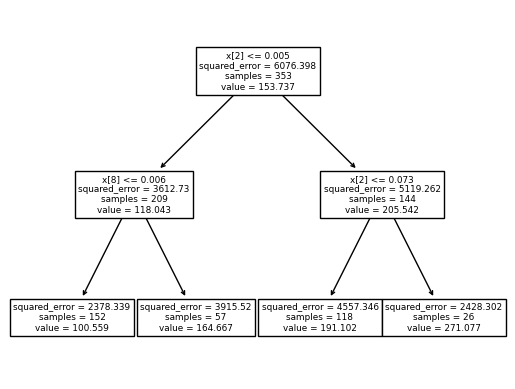

In [48]:
plot_tree(diabetes_reg)

In [49]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = diabetes_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_2 = r2_score(y_test, y_pred)


print("MAE = ", mae)
print("MSE = ", mse)

MAE =  49.36534526165699
MSE =  3735.4996177389003


In [50]:
!pip3 install catboost


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\z\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [61]:
# CatBoost
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor


X = np.round(X) 
X = X.astype(int) 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor(iterations=1000,  
                          learning_rate=0.1, 
                          depth=2,  
                          random_state=42)  

model.fit(X_train, y_train, verbose=100)  
y_pred = model.predict(X_test)

# Оценка качества модели
mse_catboost = np.mean((y_test - y_pred) ** 2)  
mae_catboost = np.mean(abs(y_test - y_pred))

print("MAE_CB = ", mae_catboost)
print("MSE_CB = ", mse_catboost)

0:	learn: 50.1076909	total: 376us	remaining: 376ms
100:	learn: 14.9862192	total: 26ms	remaining: 232ms
200:	learn: 14.1376853	total: 48.6ms	remaining: 193ms
300:	learn: 13.8779659	total: 70.5ms	remaining: 164ms
400:	learn: 13.7381836	total: 91.8ms	remaining: 137ms
500:	learn: 13.6225195	total: 115ms	remaining: 114ms
600:	learn: 13.5197633	total: 139ms	remaining: 92.1ms
700:	learn: 13.4476561	total: 163ms	remaining: 69.4ms
800:	learn: 13.3777825	total: 187ms	remaining: 46.5ms
900:	learn: 13.3247478	total: 210ms	remaining: 23.1ms
999:	learn: 13.2803494	total: 232ms	remaining: 0us
MAE_CB =  13.295781955967554
MSE_CB =  263.9205507958348


In [ ]:
print("Метрики простой модели:")
print("MAE = ", mae)
print("MSE = ", mse)

print("Метрики СatВoost:")
print("MAE_CB = ", mae_catboost)
print("MSE_CB = ", mse_catboost)

Метрики простой модели:
MAE =  49.36534526165699
MSE =  375.28507087566845
Метрики СatВoost:
MAE_CB =  32.10582290711135
MSE_CB =  1578.3110640427126


In [ ]:
!pip install lightgbm


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\z\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Бустинг LightGBM
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import lightgbm as lgb

X = np.round(X)
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])


X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

model = lgb.LGBMRegressor(num_leaves=31,  
                          learning_rate=0.1,  
                          n_estimators=100,  
                          random_state=42)  
model.fit(X_train, y_train)  

y_pred = model.predict(X_test)

mse_lightgbm = np.mean((y_test - y_pred) ** 2)  
mae_lightgbm = np.mean(abs((y_test - y_pred)))

print("MAE_lightgbm = ", mae_lightgbm)
print("MSE_lightgbm = ", mse_lightgbm)

MAE_lightgbm =  38.52322651386487
MSE_lightgbm =  2323.26096534611


In [ ]:
# наилучшие гиперпараметры для модели
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostRegressor

# Генерация данных
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = CatBoostRegressor()

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'iterations': [100, 200, 300]
}


grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Наилучшие параметры: ", grid_search.best_params_)
print("Наилучшее значение RMSE на тестовом наборе: ", np.sqrt(grid_search.score(X_test, y_test)))

0:	learn: 133.1413332	total: 725us	remaining: 71.8ms
1:	learn: 132.3916647	total: 1.27ms	remaining: 62.3ms
2:	learn: 131.7051570	total: 2.04ms	remaining: 65.8ms
3:	learn: 131.0463500	total: 2.59ms	remaining: 62.2ms
4:	learn: 130.4064514	total: 3.13ms	remaining: 59.6ms
5:	learn: 129.8778941	total: 3.78ms	remaining: 59.2ms
6:	learn: 129.2099482	total: 4.3ms	remaining: 57.2ms
7:	learn: 128.5215031	total: 4.86ms	remaining: 55.9ms
8:	learn: 127.8737158	total: 5.38ms	remaining: 54.4ms
9:	learn: 127.1734616	total: 5.92ms	remaining: 53.3ms
10:	learn: 126.5371422	total: 6.48ms	remaining: 52.4ms
11:	learn: 125.9118822	total: 6.98ms	remaining: 51.2ms
12:	learn: 125.2987274	total: 7.5ms	remaining: 50.2ms
13:	learn: 124.6953035	total: 8.07ms	remaining: 49.6ms
14:	learn: 124.0877188	total: 8.58ms	remaining: 48.6ms
15:	learn: 123.5509379	total: 9.1ms	remaining: 47.8ms
16:	learn: 122.9394582	total: 9.65ms	remaining: 47.1ms
17:	learn: 122.3160010	total: 10.3ms	remaining: 47.1ms
18:	learn: 121.7587596	t